# Data Exploration Phase-01 Data

## TODO:

- [ ] [Scale pixels to a decided upon density](#pixel-density)

In [1]:
#code below from demo.py (only folder modified in this code)

from PIL import Image, ImageDraw
import glob
import os

# The initial release contains only one tile, so lets hardcode its location
# here.  When you have more tiles, you can update this
TILE_X = 7680
TILE_Y = 10240

# The expected value of a Pixel in a mask file indicating that the pixel is
# within that region.  Tuple value, (Red, Green, Blue, Alpha)
IS_IN_MASK_PIXEL_VALUE = (0, 0, 0, 255)

# Tile width / height in pixels
TILE_WIDTH_PX = 512
TILE_HEIGHT_PX = 512

# Get the physical path to the PNG image containing the mask file
def get_mask_path(tile_x, tile_y, mask_type):
    path = f"./satelite_data/phase-01/data/sentinel-2a-tile-{tile_x}x-{tile_y}y/masks/{mask_type}-mask.png"
    return path


# Open an image file and get all the pixels
def get_tile_pixels(tile_path):
    img = Image.open(tile_path)
    pixels = img.load()
    return pixels


# Get the pixels for an image file
def get_mask_pixels(tile_x, tile_y, mask_type):
    mask_path = get_mask_path(tile_x, tile_y, mask_type)
    return get_tile_pixels(mask_path)


def is_in_mask(mask_pixels, pixel_x, pixel_y):
    if mask_pixels[pixel_y, pixel_x] == IS_IN_MASK_PIXEL_VALUE:
        return True
    else:
        return False


def print_ascii_mask(tile_x, tile_y, mask_type):
    mask_pixels = get_mask_pixels(tile_x, tile_y, mask_type)

    # We don't really want to display ASCII art that is 512 characters long as it will be
    # too long to show in a terminal, so lets scale it
    scale_factor = 10

    width_in_chars = int(TILE_WIDTH_PX / scale_factor)
    height_in_chars = int(TILE_HEIGHT_PX / scale_factor)

    for x_char in range(0, width_in_chars - 1):
        for y_char in range(0, height_in_chars - 1):
            # Convert the character index back to actual pixels
            pixel_x = x_char * scale_factor
            pixel_y = y_char * scale_factor

            # is the pixel in my mask?
            in_mask = is_in_mask(mask_pixels, pixel_x, pixel_y)
            if in_mask:
                print("X", end="")
            else:
                print(" ", end="")

        # Print a newline at the end of each row
        print("\n", end="")


# Get a list of all the image tiles for a specific x,y coordinate
# for the specified band
def get_timeseries_image_paths(tile_x, tile_y, band):
    path = f"./satelite_data/phase-01/data/sentinel-2a-tile-{tile_x}x-{tile_y}y/timeseries/{tile_x}-{tile_y}-{band}*.png"
    images = glob.glob(path)
    return images


# Print out an ascii representation of the sugarcane regions
print_ascii_mask(TILE_X, TILE_Y, "sugarcane-region")

X XXXXXXXXXXXXX  XXXXXXXXX                       X
 XXXXXXXXXXXXXXXX XXXXXXXXX                       
XXXXXXXXXXXXXXXXXXXXXXXXXXX                       
X    XXXXXXXXXXXXXXXXXXXXXX                      X
XXXX  XXXXXXXXXXXXXXXXXXXXX      X               X
 XXX X XXXXXXXXXXXXXXXXXXXXX    XX               X
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX XXXX               
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX XXXXXX             
XXXXXX XXXXX XXXXXXXXXXXXXXXXXXXXX   XX           
 XXXXXX  XX    XXXXXXXXXXXXXXXXXXX X  XXXX X      
  XXXXXX  XXXX   XXXXXXX   XXXXXXXXXXXXXXXXXX     
      XXX  XXXXXXXXX       XXXXXXXXXXXXXX         
   XXXX XX  XXXXXXXXX      XXXXXXXXXXXXXX         
       XXXXX XXXXXXXX      XXXXXXXXXXXXXX        X
XX      XXXXXXXXXXXXX  XX  XXXXXXXXXXXXXX    X    
XXXXXXXXX  XXXXXXXXXXXXXXXX XXXXXXXXXXXXXX  XX    
XXXXXXXXXXX      XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX  
 XXXXXXXXXXX      XXXXXXXXXXXXXXXXXXXXXXXXXXX XXX 
XXXXXXXXXXXXX    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX XX
XXXXXXXXXXXXX X XXXXXXXXXXXXXXX

## Sentinal 2A Band Data

According to the guide there are 12 Bands. Each Band relates to a different sensor wavelength:

Following is the data taken from the guide:

| Sentinel-2 Bands              | Central Wavelength ($\mu$m) | Resolution (m) |
| ----------------------------- | ------------------------------ | -------------- |
| Band 1 - Coastal aerosol      | 0.443                          | 60             |
| Band 2 - Blue                 | 0.490                          | 10             |
| Band 3 - Green                | 0.560                          | 10             |
| Band 4 - Red                  | 0.665                          | 10             |
| Band 5 - Vegetation Red Edge  | 0.705                          | 20             |
| Band 6 - Vegetation Red Edge  | 0.783                          | 20             |
| Band 7 - Vegetation Red Edge  | 0.842                          | 20             |
| Band 8 - NIR                  | 0.842                          | 10             |
| Band 8A - Vegetation Red Edge | 0.865                          | 20             |
| Band 9 - Water vapour         | 0.945                          | 60             |
| Band 10 - SWIR - Cirrus       | 1.375                          | 20             |
| Band 11 - SWIR                | 1.610                          | 20             |
| Band 12 - SWIR                | 2.190                          | 20             |


There is also a TCI band which seems to be the photo band and is seperate from the sensor photos.


### Pixel Density Issue
Breaking down our features, for each pixel with have 12 features, resulting in 512*512*12 features for a 512x512 image. However if we remove masked pixels it will be lower, however this then brings in the issue that for different images there would be a different number of features depending on the number of "valid" pixels in the image.

Possible solution is to simplify by taking averages of pixel groups, effectively resizing down to a decided upon resolution. How best to do this (nearest pixel scaling) is one problem to be solved. 

**Solution for now** use valid pixels since this is only one image and will not have different scales of valid pixels.



In [2]:
#time series image paths for a sensing band
get_timeseries_image_paths(TILE_X, TILE_Y, "TCI")

['./satelite_data/phase-01/data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2017-08-19.png',
 './satelite_data/phase-01/data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2017-06-20.png',
 './satelite_data/phase-01/data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2017-01-01.png',
 './satelite_data/phase-01/data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2016-12-22.png',
 './satelite_data/phase-01/data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2017-11-07.png',
 './satelite_data/phase-01/data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2019-01-21.png',
 './satelite_data/phase-01/data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2018-12-02.png',
 './satelite_data/phase-01/data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2018-05-26.png',
 './satelite_data/phase-01/data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2019-04-11.png',
 './satelite_data/phase-01/data/sentinel-2a-tile-7680x-

In [3]:
import json

def get_json_data(tile_x, tile_y, file_date):
    json_testpath = f"./satelite_data/phase-01/data/sentinel-2a-tile-{tile_x}x-{tile_y}y/metadata/{file_date}.json"
    with open(json_testpath, 'r') as fr:
        json_teststring = fr.read()
    json_dict = json.loads(json_teststring)
    return json_dict
    
dct = get_json_data(TILE_X, TILE_Y, "2018-11-02")
dct['metadata'].keys()

dict_keys(['collection', 'license', 'productIdentifier', 'parentIdentifier', 'title', 'description', 'organisationName', 'startDate', 'completionDate', 'productType', 'processingLevel', 'platform', 'instrument', 'resolution', 'sensorMode', 'orbitNumber', 'quicklook', 'thumbnail', 'updated', 'published', 'snowCover', 'cloudCover', 'keywords', 'centroid', 'softwareVersion', 'processingTime', 'services', 'links'])

## Cloud Cover

Cloud cover is a huge issue in the TCI bands as it obscures the ground and causes large shadow areas.

Strategy.

1. Load one images from TCI
2. Classify each pixel as either green, brown, black, or white
3. Try to use edge detection to detect:
      - edge of clouds 
      - edge of cloud shadows
      - edge of green fields 
      - edge of brown fields

float32
(512, 512, 3)


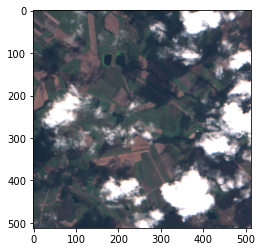

In [4]:
from matplotlib import image
import matplotlib.pyplot as plt

#this image has a good mix of clouds, shadow and brown/green areas
test_image = image.imread('./satelite_data/phase-01/data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2018-07-05.png')
print(test_image.dtype)
print(test_image.shape)

plt.imshow(test_image)

In [5]:
import numpy as np
# Attempt to create a "white area" mask for the clouds

test_image = np.array(test_image)

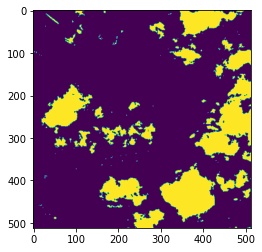

In [6]:
test_image_ravel = np.ravel(test_image)
clouds = ((np.reshape(test_image_ravel, [512*512, 3])>0.45).sum(axis=1).reshape(512,512) >= 3) + 0
plt.imshow(clouds)

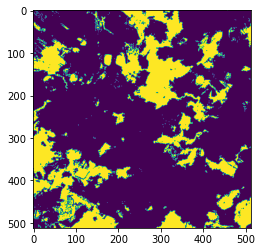

In [7]:
clouds_shadow = ((np.reshape(test_image_ravel, [512*512, 3])<0.29).sum(axis=1).reshape(512,512) >= 3) + 0
plt.imshow(clouds_shadow)

## Detecting Red/Green areas
- Brown areas (approx) 0.50, 0.39, 0.40
- Green areas (approx) 0.22, 0.30, 0.30
- Green areas (approx) 0.21, 0.37, 0.30

##### Manual Observations: 
**Brown areas:** More Red than Green or Blue <br>
**Green Areas:** Low Red, High green, Less Blue than Green

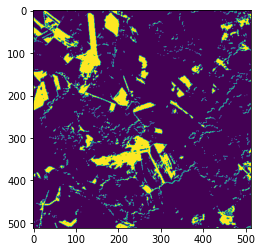

In [8]:
#detecting 'red' areas
list_of_pixels = np.reshape(test_image_ravel, [512*512, 3])
red_areas = np.reshape(((list_of_pixels - np.reshape(list_of_pixels[:,0], [512*512, 1])).sum(axis=1) <= 0) + 0, [512,512])
red_areas = np.maximum(red_areas - clouds,0) #remove clouds
plt.imshow(red_areas)

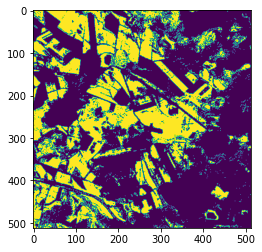

In [12]:
#detecting 'green' areas
list_of_pixels = np.reshape(test_image_ravel, [512*512, 3])
green_areas = np.reshape(((list_of_pixels - np.reshape(list_of_pixels[:,1], [512*512, 1])).sum(axis=1) <= 0) + 0, [512,512])
green_areas = np.maximum(green_areas - clouds,0) #remove clouds
plt.imshow(green_areas)

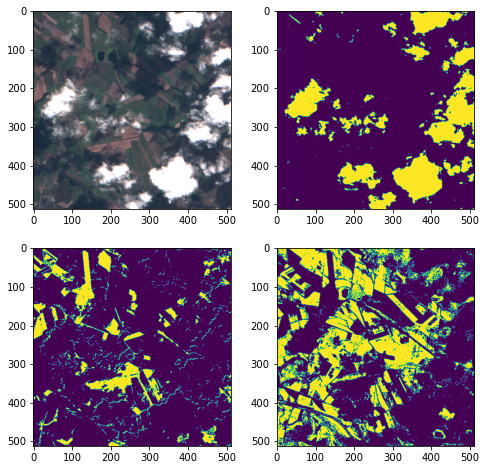

In [13]:
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(test_image)

fig.add_subplot(rows, columns, 2)
plt.imshow(clouds)

fig.add_subplot(rows, columns, 3)
plt.imshow(red_areas)

fig.add_subplot(rows, columns, 4)
plt.imshow(green_areas)

plt.show()

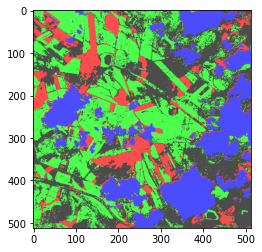

In [41]:
# combine layers into one image
coloured_mask = np.column_stack((np.reshape(red_areas, [512*512,1]), np.reshape(green_areas, [512*512,1]), np.reshape(clouds, [512*512,1])))
#coloured_mask = np.reshape(coloured_mask, [512,512,3]) 
coloured_mask = np.minimum(np.reshape(coloured_mask.ravel(),[512,512,3]) + 0.3, 1)
plt.imshow(coloured_mask)

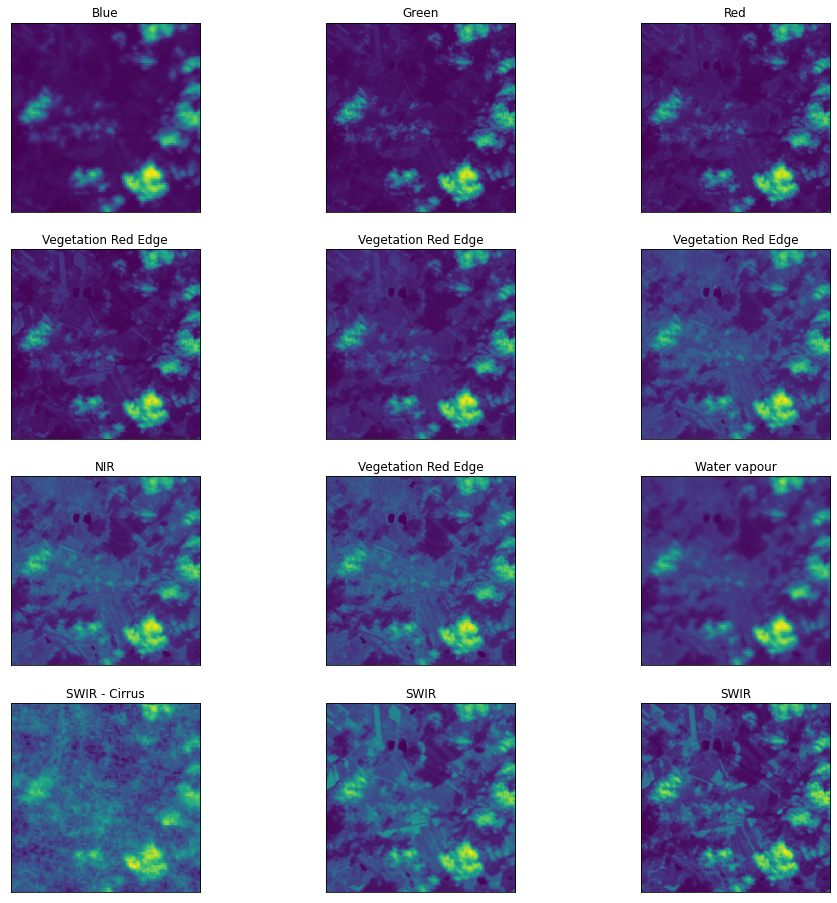

In [57]:
# display the different wavelengths as images maybe

w = 10
h = 10
fig = plt.figure(figsize=(16, 16))
columns = 3
rows = 4
titles = ['Coastal aerosol', 'Blue', 'Green', 'Red', 
          'Vegetation Red Edge', 
          'Vegetation Red Edge', 'Vegetation Red Edge', 
          'NIR', 'Vegetation Red Edge', 
          'Water vapour', 
          'SWIR - Cirrus', 
          'SWIR', 
          'SWIR']

for i in range(1,13):
    test_image = image.imread(f'./satelite_data/phase-01/data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-B{i:02d}-2018-07-05.png')
    ax = fig.add_subplot(rows, columns, i)
    ax.set_title(titles[i])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(test_image+0.3)

plt.show()